 #  A Whale off the Port(folio)


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline



# Data Cleaning

Read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")

whale_df=pd.read_csv(whale_returns_csv)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [3]:
# Count nulls

whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls

whale_df.dropna(inplace=True)
whale_df=whale_df.set_index('Date')
whale_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df=pd.read_csv(algo_returns_csv)
algo_returns_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()
algo_returns_df=algo_returns_df.set_index('Date')
print(algo_returns_df)

              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001857  0.008284
2014-06-09 -0.005012  0.005668
2014-06-10  0.004406 -0.000735
2014-06-11  0.004760 -0.003761
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1235 rows x 2 columns]


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df=pd.read_csv(sp500_history_csv,parse_dates=['Date'], infer_datetime_format=True)
sp500_df["Date"] = sp500_df["Date"].dt.strftime('%Y-%m-%d')
sp500_df

,Date,Close
0,2019-04-23,$2933.68
1,2019-04-22,$2907.97
2,2019-04-18,$2905.03
3,2019-04-17,$2900.45
4,2019-04-16,$2907.06
...,...,...
1644,2012-10-05,$1460.93
1645,2012-10-04,$1461.40
1646,2012-10-03,$1450.99
1647,2012-10-02,$1445.75


In [9]:
# Check Data Types
sp500_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_df
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)
sp500_df['Date'] = sp500_df['Date'].astype(str)
#sp500_df['Date']=pd.to_datetime(sp500_df['Date'])
sp500_df=sp500_df.set_index('Date')

sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
# Calculate Daily Returns
sp500_df.head(20)
sp500_df.dtypes

sp500_daily_returns=sp500_df.pct_change()
sp500_daily_returns

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [12]:
# Drop nulls
sp500_daily_returns
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()


Close    0
dtype: int64

In [13]:
# Rename Column
sp500_daily_returns=sp500_daily_returns.rename(columns={'Close':'S&P 500'})
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame

whale_df=whale_df.sort_values('Date')
algo_returns_df=algo_returns_df.sort_values('Date')
sp500_daily_returns=sp500_daily_returns.sort_values('Date')

combo_df=pd.concat([whale_df,algo_returns_df,sp500_daily_returns], axis=1, join='outer')

combo_df


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2014-05-29,NaN,NaN,NaN,NaN,NaN,NaN,-0.001840
2014-05-30,NaN,NaN,NaN,NaN,NaN,NaN,-0.000727
2014-06-02,NaN,NaN,NaN,NaN,NaN,NaN,0.000379
2014-06-03,NaN,NaN,NaN,NaN,NaN,NaN,-0.001888


In [15]:
combo_df.dropna(inplace=True)
combo_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011


# Portfolio Analysis

Calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

<AxesSubplot:>

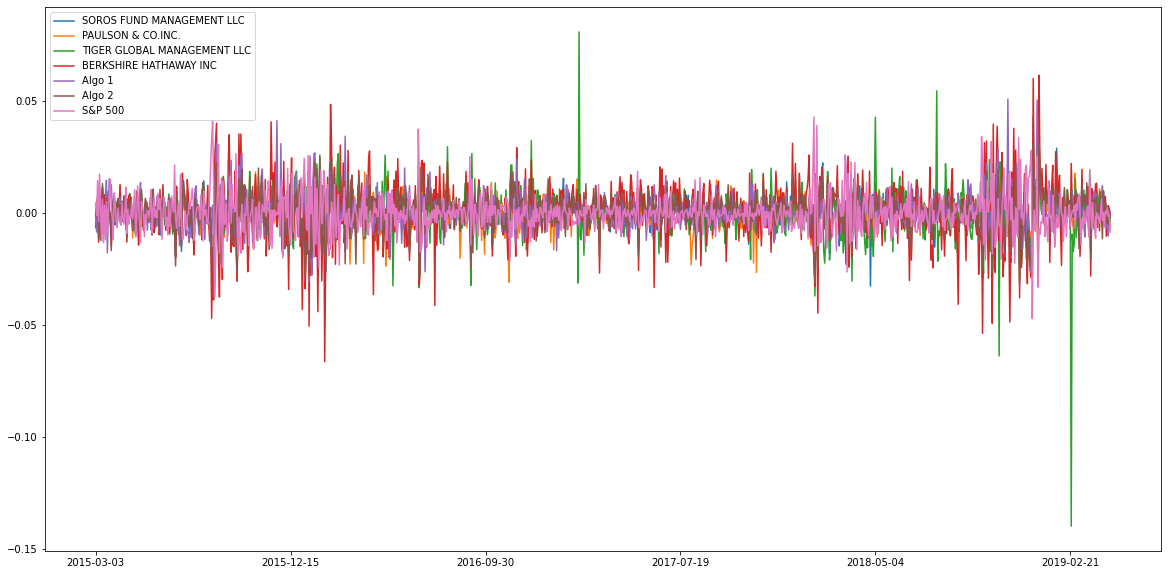

In [16]:
# Plot daily returns

combo_df.plot(figsize=(20,10))
#algo_returns_df.plot()



<AxesSubplot:>

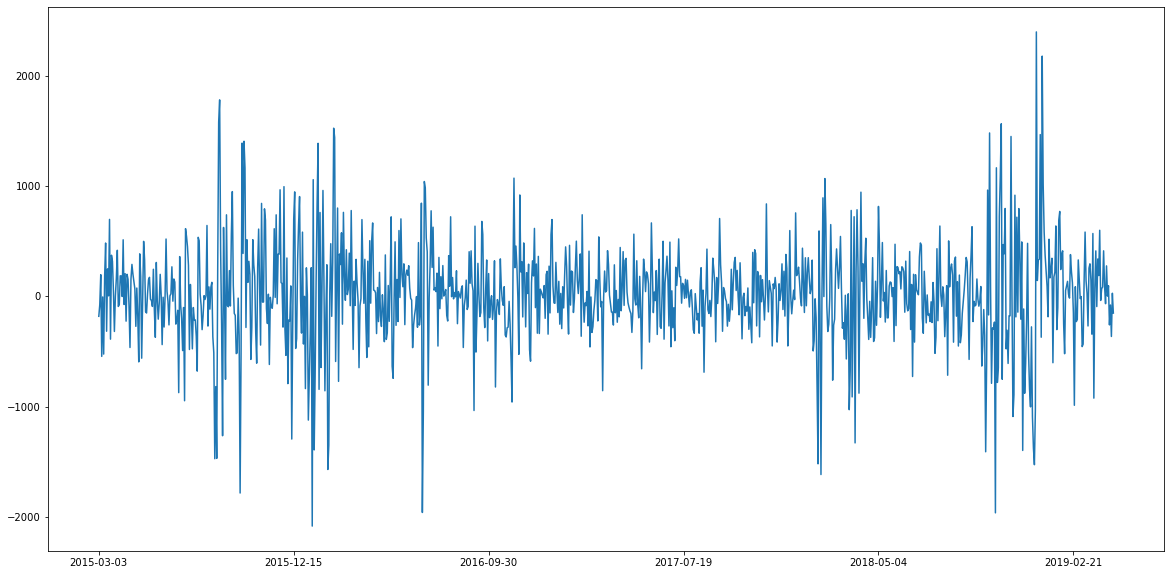

In [17]:
# Plot cumulative returns
combo_df
weight = 10000

portfolio_returns = weight * combo_df["SOROS FUND MANAGEMENT LLC"] +weight * combo_df["PAULSON & CO.INC. "] +weight * combo_df["TIGER GLOBAL MANAGEMENT LLC"]+weight * combo_df["BERKSHIRE HATHAWAY INC"]+weight * combo_df["Algo 1"] +weight * combo_df["Algo 2"]+ weight * combo_df["Algo 1"]
portfolio_returns.head(200)
portfolio_returns.plot(figsize=(20,10))

## Risk

Determine the _risk_ 



In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 


portfolio_std=combo_df.std()
portfolio_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [19]:
# Determine which portfolios are riskier than the S&P 500


riskier_than_sp500=portfolio_std[ portfolio_std.iloc[:]>= portfolio_std['S&P 500'] ]   
riskier_than_sp500



TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
S&P 500                        0.008587
dtype: float64

In [20]:
# Calculate the annualized standard deviation (252 trading days)


annualized_std = portfolio_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 


<AxesSubplot:>

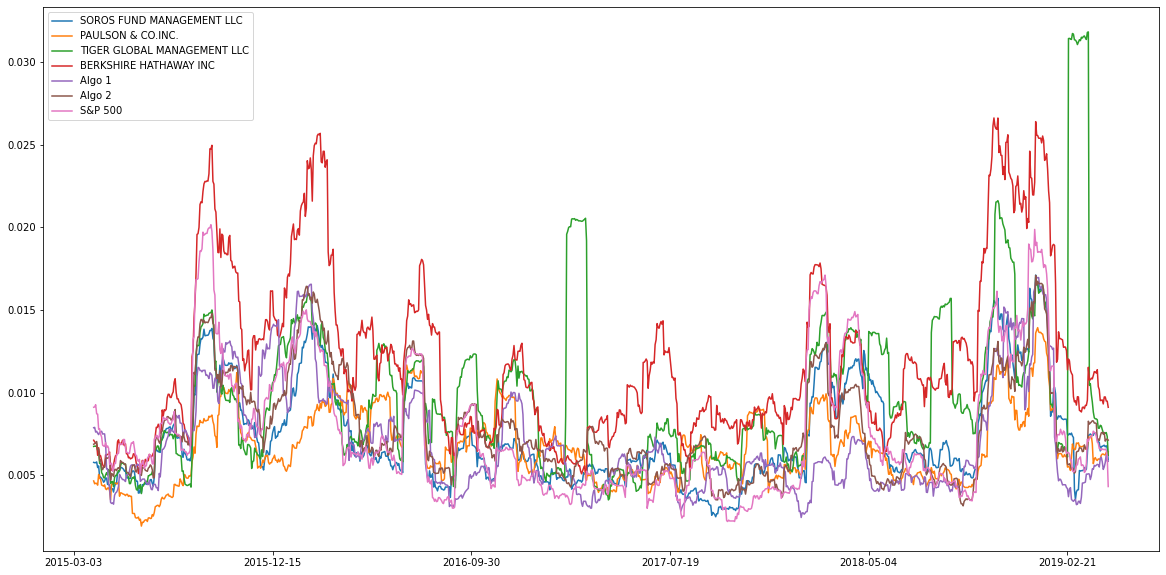

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window


combo_df.rolling(window=21).std().plot(figsize=(20,10))


In [22]:
# Construct a correlation table
correlation=combo_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000009
2019-04-16    0.000006
2019-04-17    0.000005
2019-04-18    0.000005
2019-04-22    0.000007
Length: 1042, dtype: float64
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000041
2019-04-16    0.000037
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
Name: S&P 500, Length: 1042, dtype: float64


<AxesSubplot:>

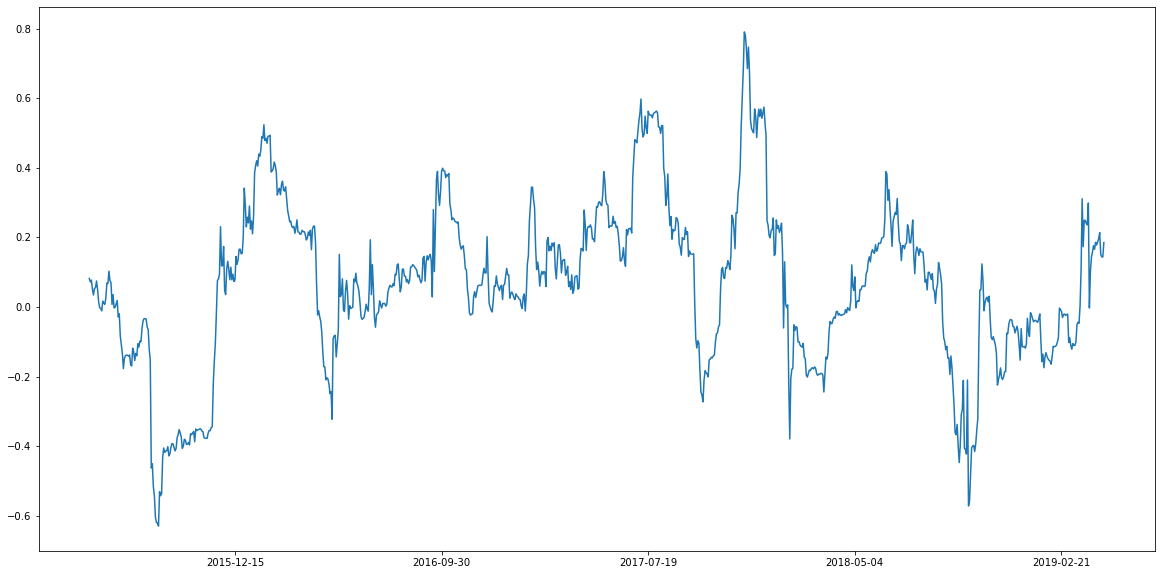

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

#Covariance
berkshire_covariance = combo_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combo_df['S&P 500'])

#S&P Variance
snp_variance =combo_df['S&P 500'].rolling(window=60).var()

#Test
print(berkshire_covariance)
print(snp_variance)

#Calculate Beta
whale_beta = berkshire_covariance / snp_variance
whale_beta.plot(figsize=(20,10))


<AxesSubplot:>

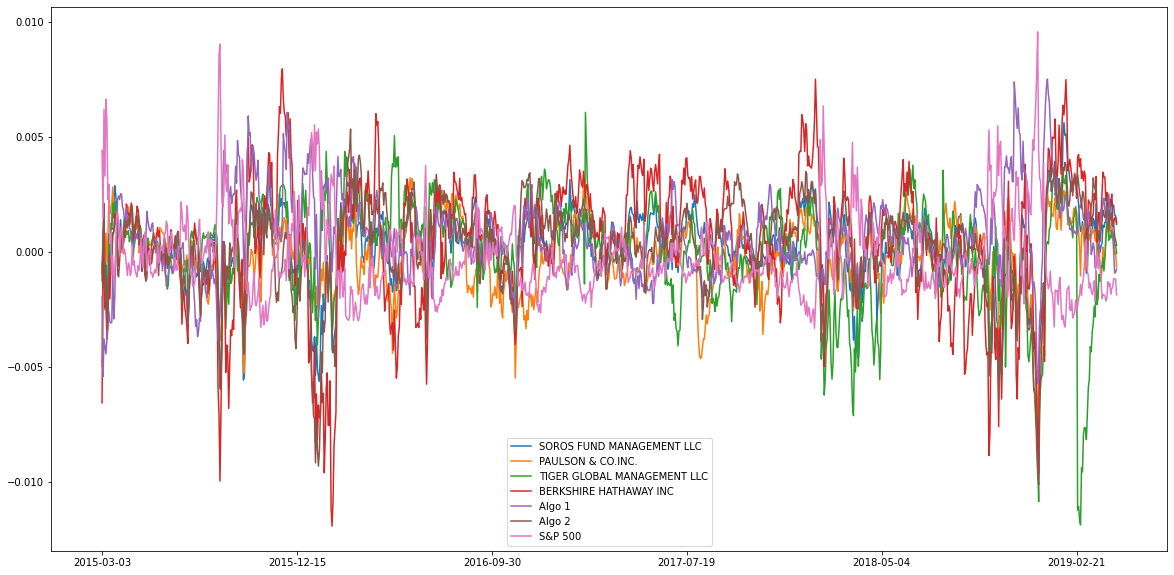

In [24]:
# Calculate a rolling window using the exponentially weighted moving average. 

combo_df.ewm(span=21).mean().plot(figsize=(20,10))
#check on pandas ema function 

---

## Sharpe Ratios


In [25]:
# Calculate annualized Sharpe Ratios

sharpe_ratios = (combo_df.mean() * 252) / (portfolio_std * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
dtype: float64

<AxesSubplot:>

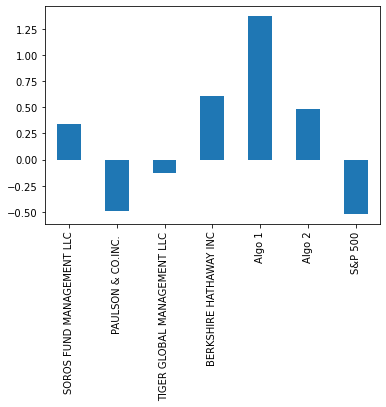

In [26]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? 

---

# Portfolio Returns


In [27]:
my_returns_csv = Path("Resources/my_port.csv")

myport_df=pd.read_csv(my_returns_csv)
myport_df.drop(columns=['Date.1','Date.2'],inplace=True)
myport_df.rename(columns={'Date':"Trade Date",'Close':'MSTR',"Close.1":"GOOG","Close.2":"TWTR"}, inplace=True)
myport_df=myport_df.set_index("Trade Date")

# Read the first stock

first_df=myport_df['MSTR']
first_df

Trade Date
2015-03-03    179.19
2015-03-04    174.68
2015-03-05    170.30
2015-03-06    161.72
2015-03-09    164.86
               ...  
2019-10-09    144.37
2019-10-10    143.52
2019-10-11    144.15
2019-10-14    143.94
2019-10-15    144.18
Name: MSTR, Length: 1165, dtype: float64

In [28]:
# Read the second stock
second_df=myport_df['GOOG']
second_df

Trade Date
2015-03-03     572.07
2015-03-04     571.80
2015-03-05     573.76
2015-03-06     566.13
2015-03-09     567.29
               ...   
2019-10-09    1202.31
2019-10-10    1208.67
2019-10-11    1215.45
2019-10-14    1217.14
2019-10-15    1243.01
Name: GOOG, Length: 1165, dtype: float64

In [29]:
# Read the third stock
third_df=myport_df['TWTR']
third_df

Trade Date
2015-03-03    47.71
2015-03-04    47.57
2015-03-05    47.35
2015-03-06    46.75
2015-03-09    47.59
              ...  
2019-10-09    39.50
2019-10-10    39.54
2019-10-11    40.36
2019-10-14    39.78
2019-10-15    40.28
Name: TWTR, Length: 1165, dtype: float64

In [30]:
# Concatenate all stocks into a single DataFrame
myport_df



,MSTR,GOOG,TWTR
Trade Date,,,
2015-03-03,179.19,572.07,47.71
2015-03-04,174.68,571.80,47.57
2015-03-05,170.30,573.76,47.35
2015-03-06,161.72,566.13,46.75
2015-03-09,164.86,567.29,47.59
...,...,...,...
2019-10-09,144.37,1202.31,39.50
2019-10-10,143.52,1208.67,39.54
2019-10-11,144.15,1215.45,40.36


In [31]:
# Reset the index

myport_df

,MSTR,GOOG,TWTR
Trade Date,,,
2015-03-03,179.19,572.07,47.71
2015-03-04,174.68,571.80,47.57
2015-03-05,170.30,573.76,47.35
2015-03-06,161.72,566.13,46.75
2015-03-09,164.86,567.29,47.59
...,...,...,...
2019-10-09,144.37,1202.31,39.50
2019-10-10,143.52,1208.67,39.54
2019-10-11,144.15,1215.45,40.36


In [32]:
# Pivot so that each column of prices represents a unique symbol

myport_df

,MSTR,GOOG,TWTR
Trade Date,,,
2015-03-03,179.19,572.07,47.71
2015-03-04,174.68,571.80,47.57
2015-03-05,170.30,573.76,47.35
2015-03-06,161.72,566.13,46.75
2015-03-09,164.86,567.29,47.59
...,...,...,...
2019-10-09,144.37,1202.31,39.50
2019-10-10,143.52,1208.67,39.54
2019-10-11,144.15,1215.45,40.36


In [33]:
# Drop Nulls

myport_df.dropna(inplace=True)
myport_df

,MSTR,GOOG,TWTR
Trade Date,,,
2015-03-03,179.19,572.07,47.71
2015-03-04,174.68,571.80,47.57
2015-03-05,170.30,573.76,47.35
2015-03-06,161.72,566.13,46.75
2015-03-09,164.86,567.29,47.59
...,...,...,...
2019-10-09,144.37,1202.31,39.50
2019-10-10,143.52,1208.67,39.54
2019-10-11,144.15,1215.45,40.36


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns

weights = [1/3, 1/3, 1/3]

myport_returns = myport_df.pct_change().dot(weights)
myport_returns

#mstr_weight = 1/3
#goog_weight = 1/3
#twtr_weight = 1/3

#myport_returns = mstr_weight * myport_df["MSTR"].pct_change() + goog_weight * myport_df["GOOG"].pct_change() + twtr_weight * myport_df['TWTR'].pct_change()
#myport_returns.head()



Trade Date
2015-03-03         NaN
2015-03-04   -0.009525
2015-03-05   -0.008757
2015-03-06   -0.025451
2015-03-09    0.013144
                ...   
2019-10-09    0.002965
2019-10-10    0.000138
2019-10-11    0.010246
2019-10-14   -0.004812
2019-10-15    0.011830
Length: 1165, dtype: float64

##  all of the portfolio returns

In [35]:
# Add portfolio to the larger dataframe of fund returns

frame=[combo_df,myport_returns]
fullport = pd.concat(frame, axis='columns')
fullport .rename(columns={0:'My Port'},inplace=True)


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

fullport.dropna(inplace=True)
fullport

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Port
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.009525
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,-0.008757
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.025451
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.013144
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,0.001921,-0.028090
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.001725
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.002767
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,-0.003944
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,-0.004434


## Re-run the performance and risk analysis and compare to the others

In [37]:
# Risk

daily_std=fullport.std()
print(f"\tThe daily standard deviation:\n{daily_std}")

annual_std=daily_std * np.sqrt(252)
print(f"\n\n\tThe annualized Standard Deviation:\n{annual_std}")

riskier_than_sp500=annual_std[ annual_std.iloc[:] > annual_std['S&P 500'] ]   
print(f"\n\n\tThese are all riskier than the S&P 500 over the same period:\n{riskier_than_sp500}")

	The daily standard deviation:
SOROS FUND MANAGEMENT LLC      0.007900
PAULSON & CO.INC.              0.007027
TIGER GLOBAL MANAGEMENT LLC    0.010903
BERKSHIRE HATHAWAY INC         0.012923
Algo 1                         0.007626
Algo 2                         0.008345
S&P 500                        0.008590
My Port                        0.016410
dtype: float64


	The annualized Standard Deviation:
SOROS FUND MANAGEMENT LLC      0.125406
PAULSON & CO.INC.              0.111556
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
Algo 1                         0.121058
Algo 2                         0.132475
S&P 500                        0.136359
My Port                        0.260495
dtype: float64


	These are all riskier than the S&P 500 over the same period:
TIGER GLOBAL MANAGEMENT LLC    0.173072
BERKSHIRE HATHAWAY INC         0.205148
My Port                        0.260495
dtype: float64


<AxesSubplot:>

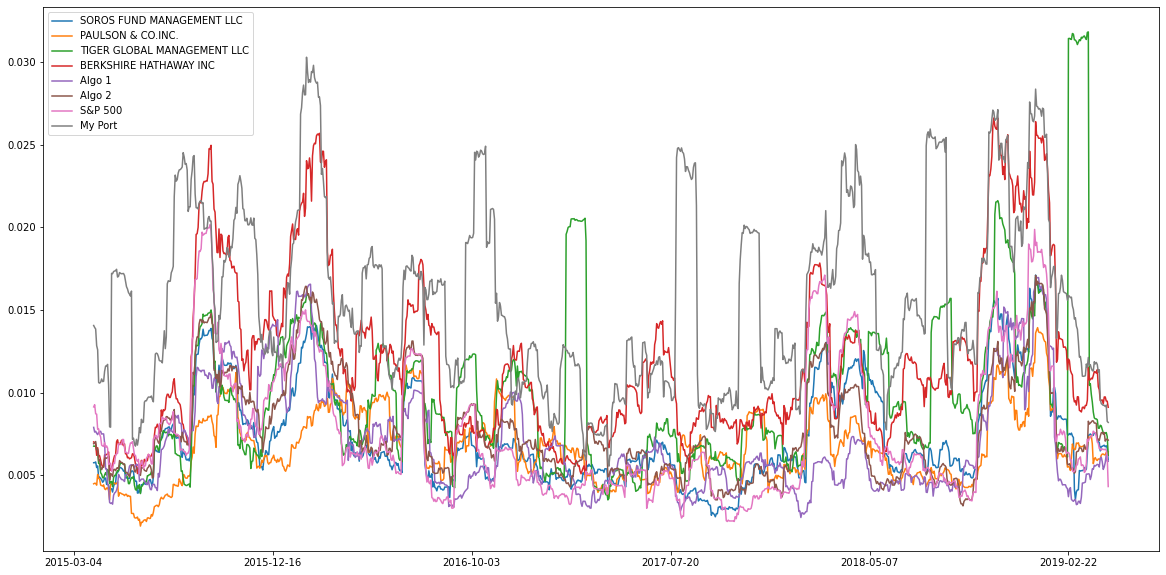

In [38]:
# Rolling

fullport.rolling(window=21).std().plot(figsize=(20,10))


In [39]:
# Annualized Sharpe Ratios

sharpe_ratios = (fullport.mean() * 252) / (annual_std * np.sqrt(252))
print(sharpe_ratios) 

SOROS FUND MANAGEMENT LLC      0.021765
PAULSON & CO.INC.             -0.030298
TIGER GLOBAL MANAGEMENT LLC   -0.008161
BERKSHIRE HATHAWAY INC         0.038733
Algo 1                         0.086567
Algo 2                         0.030634
S&P 500                       -0.033181
My Port                        0.022354
dtype: float64


<AxesSubplot:>

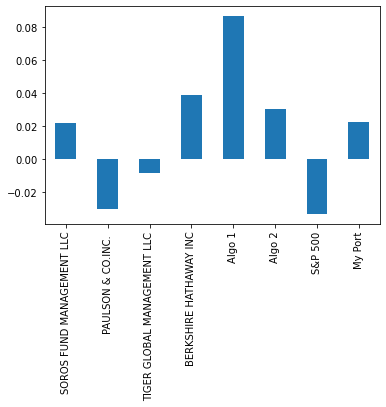

In [40]:
# Visualize the sharpe ratios as a bar plot


sharpe_ratios.plot(kind='bar')

In [41]:
# Create a correlation analysis

correlation=fullport.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,My Port
SOROS FUND MANAGEMENT LLC,1.000000,0.699870,0.561043,0.754182,0.320864,0.826726,0.000669,0.579887
PAULSON & CO.INC.,0.699870,1.000000,0.434380,0.545294,0.268483,0.678147,0.013910,0.416337
TIGER GLOBAL MANAGEMENT LLC,0.561043,0.434380,1.000000,0.424166,0.164111,0.507161,-0.001485,0.338311
BERKSHIRE HATHAWAY INC,0.754182,0.545294,0.424166,1.000000,0.291557,0.687785,-0.013573,0.603462
Algo 1,0.320864,0.268483,0.164111,0.291557,1.000000,0.287823,-0.033790,0.203729
Algo 2,0.826726,0.678147,0.507161,0.687785,0.287823,1.000000,-0.002116,0.586681
S&P 500,0.000669,0.013910,-0.001485,-0.013573,-0.033790,-0.002116,1.000000,-0.036319
My Port,0.579887,0.416337,0.338311,0.603462,0.203729,0.586681,-0.036319,1.000000


2015-04-01    0.391534
2015-04-02    0.384896
2015-04-06    0.520782
2015-04-07    0.432997
2015-04-08    0.370350
                ...   
2019-04-15    0.016481
2019-04-16    0.025042
2019-04-17    0.014730
2019-04-18    0.266373
2019-04-22    0.107251
Length: 1021, dtype: float64

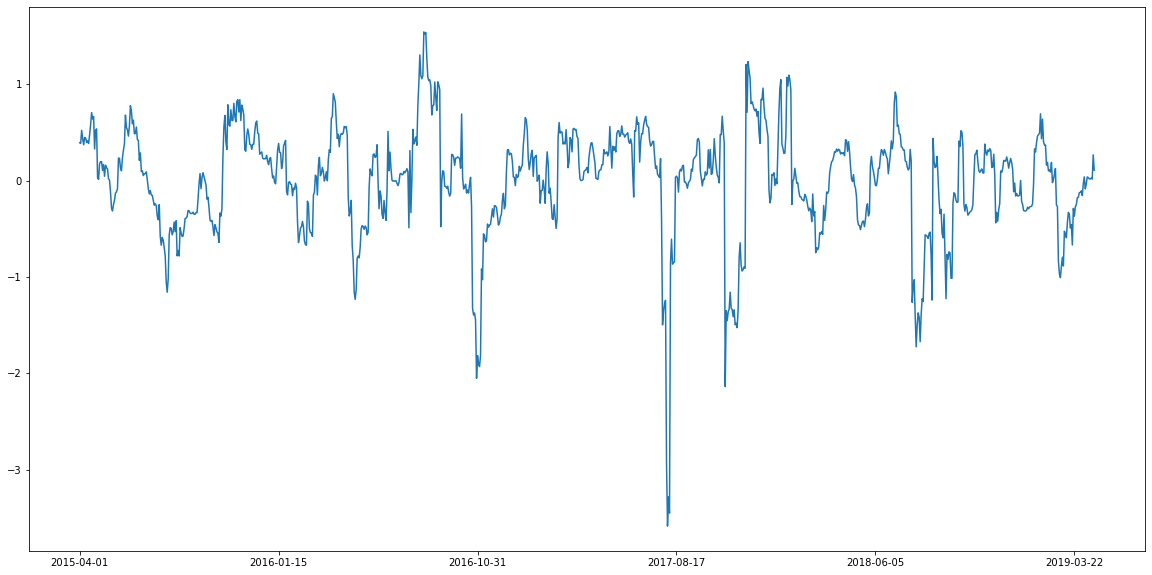

In [42]:
# Beta


#Covariance
fullport_covariance = fullport['My Port'].rolling(window=21).cov(fullport['S&P 500'])

#S&P Variance
snp_variance =fullport['S&P 500'].rolling(window=21).var()

#Test
#print(fullport_covariance)
#print(snp_variance)

#Calculate Beta
myport_beta = fullport_covariance / snp_variance
myport_beta.dropna(inplace=True)
myport_beta.plot(figsize=(20,10))
myport_beta